In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

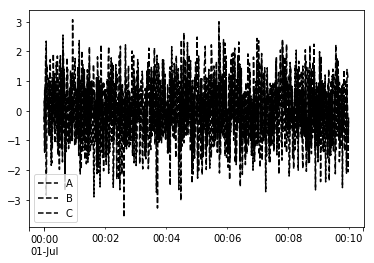

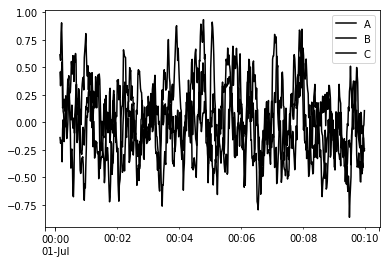

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [9]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

AttributeError: module 'pandas' has no attribute 'ewma'

In [10]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [11]:
df.head()

,A,B,C,D
2016-06-06,-0.202404,-0.474893,1.111769,0.399668
2016-06-07,-0.676015,-1.147680,-1.484765,0.437897
2016-06-08,-0.200980,0.476504,0.460620,0.317293
2016-06-09,0.371671,-1.316620,1.650398,0.901222
2016-06-10,1.798805,-0.282479,-0.682257,0.145828


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B6D68B38>,
      dtype=object)

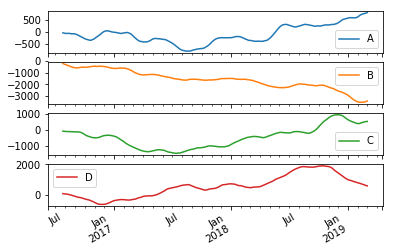

In [12]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [13]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

C:\Users\Jergb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.021108,0.671176,0.750630,0.630029


In [14]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.540411,-1.048733,0.369387,0.618616
2016-06-08,-0.720074,-1.081179,0.275466,0.797364
2016-06-09,-0.716988,-1.426557,0.641105,1.112043
2016-06-10,-0.355375,-1.690279,0.724037,1.330016


In [15]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [16]:
# EWMA
# Why use EWMA?

In [17]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [18]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting